<a href="https://colab.research.google.com/github/SantiagoVillalobosB/Machine_Learning_2022/blob/Main/PROYECTO_8_16_05_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**importación librerias**

In [120]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.svm import SVC 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import tree
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage 
from sklearn.preprocessing import StandardScaler
from sklearn import svm
warnings.filterwarnings("ignore")


In [121]:
df = pd.read_csv('https://raw.githubusercontent.com/labeconometria/proyectos/main/economicas.csv')

In [122]:
df.describe()


,RESULT_CODIGOPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,PERIODO,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,ESTU_CODDANE_COLE_TERMINO,ESTU_COD_COLE_MCPIO_TERMINO,INST_COD_INSTITUCION,ESTU_SNIES_PRGMACADEMICO,...,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES
count,3855.0,3855.000000,3855.000000,3855.0,3855.000000,3855.000000,2.768000e+03,2768.000000,3855.000000,3855.000000,...,3855.000000,3801.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3724.000000,3724.000000,3855.000000
mean,2001.0,123.739818,1.622049,20212.0,55.073152,29283.845396,2.364019e+11,32569.526012,1893.681453,29043.246174,...,149.962387,2.552749,59.087938,49.790921,159.772763,50.912581,66.143191,52.392272,2.339689,2.204929
std,0.0,36.175271,0.823615,0.0,1610.310349,25136.372255,1.025651e+11,25939.905800,1311.513573,35056.757368,...,41.331389,0.835979,29.619982,29.587852,27.648861,29.371215,27.476116,10.889558,1.162039,0.945877
min,2001.0,0.000000,1.000000,20212.0,5.000000,5001.000000,1.500010e+10,5001.000000,1101.000000,18.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,24.208587,1.000000,1.000000
25%,2001.0,102.000000,1.000000,20212.0,11.000000,11001.000000,1.255130e+11,11001.000000,1205.000000,1442.000000,...,126.000000,2.000000,34.000000,24.000000,142.000000,25.000000,46.000000,44.514557,1.000000,2.000000
50%,2001.0,119.000000,1.000000,20212.0,13.000000,13001.000000,2.520010e+11,19055.500000,1714.000000,9980.000000,...,154.000000,3.000000,65.000000,50.000000,160.000000,51.000000,73.000000,51.448311,2.000000,2.000000
75%,2001.0,144.000000,2.000000,20212.0,50.000000,50006.000000,3.130010e+11,54001.000000,1826.000000,53470.000000,...,171.000000,3.000000,85.000000,75.000000,178.000000,77.000000,90.000000,59.751600,4.000000,3.000000
max,2001.0,300.000000,4.000000,20212.0,99999.000000,99999.000000,5.540013e+11,99524.000000,9913.000000,105814.000000,...,300.000000,4.000000,100.000000,100.000000,263.000000,100.000000,100.000000,81.683323,4.000000,4.000000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ESTU_CONSECUTIVO                3855 non-null   object 
 1   RESULT_CODIGOPRUEBA             3855 non-null   int64  
 2   RESULT_NOMBREPRUEBA             3855 non-null   object 
 3   RESULT_PUNTAJE                  3855 non-null   int64  
 4   RESULT_DESEMPENO                3855 non-null   int64  
 5   ESTU_AGREGADO                   3855 non-null   object 
 6   ESTU_TIPODOCUMENTO              3855 non-null   object 
 7   ESTU_NACIONALIDAD               3855 non-null   object 
 8   ESTU_GENERO                     3855 non-null   object 
 9   ESTU_FECHANACIMIENTO            3855 non-null   object 
 10  ESTU_EXTERIOR                   3855 non-null   object 
 11  PERIODO                         3855 non-null   int64  
 12  ESTU_ESTUDIANTE                 38

In [124]:
df.head()

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_AGREGADO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,EK202120243329,2001,ANÁLISIS ECONÓMICO,128,2,S,CC,COLOMBIA,M,14/10/1996,...,3.0,71,57,201,95,99,51.049129,2.0,3,PUBLICAR
1,EK202120227314,2001,ANÁLISIS ECONÓMICO,209,4,S,CC,COLOMBIA,M,17/02/2001,...,4.0,100,100,222,99,100,66.866795,4.0,4,PUBLICAR
2,EK202120088295,2001,ANÁLISIS ECONÓMICO,106,1,S,CC,COLOMBIA,M,02/10/1991,...,NaN,1,1,88,1,2,37.751353,1.0,2,PUBLICAR
3,EK202120120119,2001,ANÁLISIS ECONÓMICO,89,1,S,CC,COLOMBIA,F,23/07/1998,...,1.0,12,7,159,49,71,59.846055,4.0,2,PUBLICAR
4,EK202120248108,2001,ANÁLISIS ECONÓMICO,122,1,S,CC,COLOMBIA,M,23/09/1997,...,2.0,20,13,156,44,67,48.248516,2.0,2,PUBLICAR


In [125]:
df.shape

(3855, 97)

In [126]:
df.columns

Index(['ESTU_CONSECUTIVO', 'RESULT_CODIGOPRUEBA', 'RESULT_NOMBREPRUEBA',
       'RESULT_PUNTAJE', 'RESULT_DESEMPENO', 'ESTU_AGREGADO',
       'ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'ESTU_EXTERIOR', 'PERIODO', 'ESTU_ESTUDIANTE',
       'ESTU_PAIS_RESIDE', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO',
       'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_AREARESIDE',
       'ESTU_COLE_TERMINO', 'ESTU_CODDANE_COLE_TERMINO',
       'ESTU_COD_COLE_MCPIO_TERMINO', 'ESTU_TITULOOBTENIDOBACHILLER',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PAGOMATRICULABECA',
       'ESTU_PAGOMATRICULACREDITO', 'ESTU_PAGOMATRICULAPADRES',
       'ESTU_PAGOMATRICULAPROPIO', 'ESTU_COMOCAPACITOEXAMENSB11',
       'ESTU_TIPODOCUMENTOSB11', 'ESTU_SEMESTRECURSA', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE', 'FAMI_ESTRATOVIVIENDA',
       'ESTU_OTROCOLE_TERMINO', 'FAMI_TIENEINTERNET', 'FAMI_TI

In [127]:
df.head()

,ESTU_CONSECUTIVO,RESULT_CODIGOPRUEBA,RESULT_NOMBREPRUEBA,RESULT_PUNTAJE,RESULT_DESEMPENO,ESTU_AGREGADO,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,...,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PNBC,PUNT_GLOBAL,PERCENTIL_NBC,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_IES,ESTU_ESTADOINVESTIGACION
0,EK202120243329,2001,ANÁLISIS ECONÓMICO,128,2,S,CC,COLOMBIA,M,14/10/1996,...,3.0,71,57,201,95,99,51.049129,2.0,3,PUBLICAR
1,EK202120227314,2001,ANÁLISIS ECONÓMICO,209,4,S,CC,COLOMBIA,M,17/02/2001,...,4.0,100,100,222,99,100,66.866795,4.0,4,PUBLICAR
2,EK202120088295,2001,ANÁLISIS ECONÓMICO,106,1,S,CC,COLOMBIA,M,02/10/1991,...,NaN,1,1,88,1,2,37.751353,1.0,2,PUBLICAR
3,EK202120120119,2001,ANÁLISIS ECONÓMICO,89,1,S,CC,COLOMBIA,F,23/07/1998,...,1.0,12,7,159,49,71,59.846055,4.0,2,PUBLICAR
4,EK202120248108,2001,ANÁLISIS ECONÓMICO,122,1,S,CC,COLOMBIA,M,23/09/1997,...,2.0,20,13,156,44,67,48.248516,2.0,2,PUBLICAR


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ESTU_CONSECUTIVO                3855 non-null   object 
 1   RESULT_CODIGOPRUEBA             3855 non-null   int64  
 2   RESULT_NOMBREPRUEBA             3855 non-null   object 
 3   RESULT_PUNTAJE                  3855 non-null   int64  
 4   RESULT_DESEMPENO                3855 non-null   int64  
 5   ESTU_AGREGADO                   3855 non-null   object 
 6   ESTU_TIPODOCUMENTO              3855 non-null   object 
 7   ESTU_NACIONALIDAD               3855 non-null   object 
 8   ESTU_GENERO                     3855 non-null   object 
 9   ESTU_FECHANACIMIENTO            3855 non-null   object 
 10  ESTU_EXTERIOR                   3855 non-null   object 
 11  PERIODO                         3855 non-null   int64  
 12  ESTU_ESTUDIANTE                 38

In [129]:
df.drop(['ESTU_CONSECUTIVO', 'RESULT_CODIGOPRUEBA', 'RESULT_NOMBREPRUEBA', 'RESULT_PUNTAJE', 'RESULT_DESEMPENO', 'ESTU_AGREGADO', 'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_ESTUDIANTE', 'ESTU_PAIS_RESIDE','ESTU_COD_RESIDE_DEPTO', 'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_AREARESIDE', 'ESTU_COLE_TERMINO', 'ESTU_CODDANE_COLE_TERMINO', 'ESTU_COD_COLE_MCPIO_TERMINO', 'ESTU_TITULOOBTENIDOBACHILLER',  'ESTU_COMOCAPACITOEXAMENSB11', 'ESTU_TIPODOCUMENTOSB11','ESTU_OTROCOLE_TERMINO', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_CUANTOSCOMPARTEBAÑO', 'ESTU_PRESENTACIONCASA', 'ESTU_PAISDOCUMENTOS11', 'ESTU_HORASSEMANATRABAJA', 'INST_COD_INSTITUCION', 'INST_NOMBRE_INSTITUCION','ESTU_SNIES_PRGMACADEMICO', 'GRUPOREFERENCIA', 'ESTU_PRGM_CODMUNICIPIO', 'ESTU_PRGM_MUNICIPIO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_NIVEL_PRGM_ACADEMICO', 'ESTU_METODO_PRGM', 'ESTU_NUCLEO_PREGRADO', 'ESTU_INST_CODMUNICIPIO', 'ESTU_INST_MUNICIPIO', 'ESTU_INST_DEPARTAMENTO', 'INST_CARACTER_ACADEMICO', 'INST_ORIGEN', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_COD_MCPIO_PRESENTACION', 'ESTU_MCPIO_PRESENTACION', 'ESTU_DEPTO_PRESENTACION', 'ESTU_COD_DEPTO_PRESENTACION','MOD_RAZONA_CUANTITAT_DESEM', 'MOD_RAZONA_CUANTITATIVO_PNAL', 'MOD_RAZONA_CUANTITATIVO_PNBC', 'MOD_LECTURA_CRITICA_DESEM', 'MOD_LECTURA_CRITICA_PNAL', 'MOD_LECTURA_CRITICA_PNBC', 'MOD_COMPETEN_CIUDADA_DESEM', 'MOD_COMPETEN_CIUDADA_PNAL','MOD_COMPETEN_CIUDADA_PNBC','MOD_INGLES_DESEM', 'MOD_INGLES_PNAL', 'MOD_INGLES_PNBC', 'MOD_COMUNI_ESCRITA_DESEM', 'MOD_COMUNI_ESCRITA_PNAL', 'MOD_COMUNI_ESCRITA_PNBC',  'PERCENTIL_NBC', 'PERCENTIL_GLOBAL', 'ESTU_INSE_INDIVIDUAL', 'ESTU_NSE_INDIVIDUAL', 'ESTU_NSE_IES', 'ESTU_ESTADOINVESTIGACION'], axis=1, inplace=True)

Se eliminaron las columnas o variables que no se consideran relevantes para este proyecto, y con eso al final obtenemos el siguiente dataset.

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ESTU_TIPODOCUMENTO              3855 non-null   object
 1   ESTU_NACIONALIDAD               3855 non-null   object
 2   ESTU_GENERO                     3855 non-null   object
 3   ESTU_EXTERIOR                   3855 non-null   object
 4   ESTU_DEPTO_RESIDE               3855 non-null   object
 5   ESTU_VALORMATRICULAUNIVERSIDAD  3850 non-null   object
 6   ESTU_PAGOMATRICULABECA          3850 non-null   object
 7   ESTU_PAGOMATRICULACREDITO       3850 non-null   object
 8   ESTU_PAGOMATRICULAPADRES        3850 non-null   object
 9   ESTU_PAGOMATRICULAPROPIO        3850 non-null   object
 10  ESTU_SEMESTRECURSA              3850 non-null   object
 11  FAMI_EDUCACIONPADRE             3760 non-null   object
 12  FAMI_EDUCACIONMADRE             3755 non-null   

In [131]:
print(f'cantidad de datos del dataset original contando todos los posibles duplicados: {df.shape}')
df.drop_duplicates(inplace = True)
print(f'cantidad de datos del dataset original cuando ya se reviso si habia datos suplicados:  {df.shape}')

cantidad de datos del dataset original contando todos los posibles duplicados: (3855, 25)
cantidad de datos del dataset original cuando ya se reviso si habia datos suplicados:  (3855, 25)


In [132]:
df.isnull().sum()

ESTU_TIPODOCUMENTO                  0
ESTU_NACIONALIDAD                   0
ESTU_GENERO                         0
ESTU_EXTERIOR                       0
ESTU_DEPTO_RESIDE                   0
ESTU_VALORMATRICULAUNIVERSIDAD      5
ESTU_PAGOMATRICULABECA              5
ESTU_PAGOMATRICULACREDITO           5
ESTU_PAGOMATRICULAPADRES            5
ESTU_PAGOMATRICULAPROPIO            5
ESTU_SEMESTRECURSA                  5
FAMI_EDUCACIONPADRE                95
FAMI_EDUCACIONMADRE               100
FAMI_TRABAJOLABORPADRE            404
FAMI_TRABAJOLABORMADRE            244
FAMI_ESTRATOVIVIENDA              134
FAMI_TIENEINTERNET                132
FAMI_TIENECOMPUTADOR              372
ESTU_PRGM_ACADEMICO                 0
MOD_RAZONA_CUANTITAT_PUNT           0
MOD_LECTURA_CRITICA_PUNT            0
MOD_COMPETEN_CIUDADA_PUNT           0
MOD_INGLES_PUNT                     0
MOD_COMUNI_ESCRITA_PUNT             0
PUNT_GLOBAL                         0
dtype: int64

In [133]:
df.dropna(subset=['ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_PAGOMATRICULABECA','ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULAPROPIO','ESTU_SEMESTRECURSA','FAMI_EDUCACIONMADRE','FAMI_TRABAJOLABORPADRE','FAMI_TRABAJOLABORMADRE', 'FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','FAMI_TIENECOMPUTADOR'], inplace=True)

In [134]:
df.isnull().sum()

ESTU_TIPODOCUMENTO                0
ESTU_NACIONALIDAD                 0
ESTU_GENERO                       0
ESTU_EXTERIOR                     0
ESTU_DEPTO_RESIDE                 0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_PAGOMATRICULABECA            0
ESTU_PAGOMATRICULACREDITO         0
ESTU_PAGOMATRICULAPADRES          0
ESTU_PAGOMATRICULAPROPIO          0
ESTU_SEMESTRECURSA                0
FAMI_EDUCACIONPADRE               0
FAMI_EDUCACIONMADRE               0
FAMI_TRABAJOLABORPADRE            0
FAMI_TRABAJOLABORMADRE            0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_TIENECOMPUTADOR              0
ESTU_PRGM_ACADEMICO               0
MOD_RAZONA_CUANTITAT_PUNT         0
MOD_LECTURA_CRITICA_PUNT          0
MOD_COMPETEN_CIUDADA_PUNT         0
MOD_INGLES_PUNT                   0
MOD_COMUNI_ESCRITA_PUNT           0
PUNT_GLOBAL                       0
dtype: int64

Se eliminaron los datos nulos para no tener problemas luego con datos faltantes.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3129 entries, 1 to 3850
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ESTU_TIPODOCUMENTO              3129 non-null   object
 1   ESTU_NACIONALIDAD               3129 non-null   object
 2   ESTU_GENERO                     3129 non-null   object
 3   ESTU_EXTERIOR                   3129 non-null   object
 4   ESTU_DEPTO_RESIDE               3129 non-null   object
 5   ESTU_VALORMATRICULAUNIVERSIDAD  3129 non-null   object
 6   ESTU_PAGOMATRICULABECA          3129 non-null   object
 7   ESTU_PAGOMATRICULACREDITO       3129 non-null   object
 8   ESTU_PAGOMATRICULAPADRES        3129 non-null   object
 9   ESTU_PAGOMATRICULAPROPIO        3129 non-null   object
 10  ESTU_SEMESTRECURSA              3129 non-null   object
 11  FAMI_EDUCACIONPADRE             3129 non-null   object
 12  FAMI_EDUCACIONMADRE             3129 non-null   

In [136]:
df.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_EXTERIOR,ESTU_DEPTO_RESIDE,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,...,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,ESTU_PRGM_ACADEMICO,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL
1,CC,COLOMBIA,M,NO,BOGOTÁ,Más de 7 millones,No,No,Si,No,...,Estrato 4,Si,Si,ECONOMIA,201,192,206,210,300,222
3,CC,COLOMBIA,F,NO,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,No,Si,No,No,...,Estrato 3,Si,Si,ECONOMÍA,146,186,173,187,101,159
4,CC,COLOMBIA,M,NO,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,No,No,No,Si,...,Estrato 3,Si,Si,ECONOMIA,158,175,165,163,117,156
5,CC,COLOMBIA,F,NO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,No,No,No,Si,...,Estrato 2,Si,Si,ECONOMIA,141,148,163,136,146,147
6,CC,COLOMBIA,M,NO,VALLE,Entre 1 millón y menos de 2.5 millones,No,Si,Si,Si,...,Estrato 3,Si,No,COMERCIO EXTERIOR,162,153,154,182,97,150


##**Reduccion de la dimensionalidad**

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3129 entries, 1 to 3850
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ESTU_TIPODOCUMENTO              3129 non-null   object
 1   ESTU_NACIONALIDAD               3129 non-null   object
 2   ESTU_GENERO                     3129 non-null   object
 3   ESTU_EXTERIOR                   3129 non-null   object
 4   ESTU_DEPTO_RESIDE               3129 non-null   object
 5   ESTU_VALORMATRICULAUNIVERSIDAD  3129 non-null   object
 6   ESTU_PAGOMATRICULABECA          3129 non-null   object
 7   ESTU_PAGOMATRICULACREDITO       3129 non-null   object
 8   ESTU_PAGOMATRICULAPADRES        3129 non-null   object
 9   ESTU_PAGOMATRICULAPROPIO        3129 non-null   object
 10  ESTU_SEMESTRECURSA              3129 non-null   object
 11  FAMI_EDUCACIONPADRE             3129 non-null   object
 12  FAMI_EDUCACIONMADRE             3129 non-null   

In [138]:
df.fillna(method='ffill')

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_EXTERIOR,ESTU_DEPTO_RESIDE,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,...,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,ESTU_PRGM_ACADEMICO,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_INGLES_PUNT,MOD_COMUNI_ESCRITA_PUNT,PUNT_GLOBAL
1,CC,COLOMBIA,M,NO,BOGOTÁ,Más de 7 millones,No,No,Si,No,...,Estrato 4,Si,Si,ECONOMIA,201,192,206,210,300,222
3,CC,COLOMBIA,F,NO,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,No,Si,No,No,...,Estrato 3,Si,Si,ECONOMÍA,146,186,173,187,101,159
4,CC,COLOMBIA,M,NO,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,No,No,No,Si,...,Estrato 3,Si,Si,ECONOMIA,158,175,165,163,117,156
5,CC,COLOMBIA,F,NO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,No,No,No,Si,...,Estrato 2,Si,Si,ECONOMIA,141,148,163,136,146,147
6,CC,COLOMBIA,M,NO,VALLE,Entre 1 millón y menos de 2.5 millones,No,Si,Si,Si,...,Estrato 3,Si,No,COMERCIO EXTERIOR,162,153,154,182,97,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,CC,COLOMBIA,M,NO,BOGOTÁ,Menos de 500 mil,No,No,Si,Si,...,Estrato 3,Si,Si,ECONOMIA,220,201,207,190,186,201
3847,CC,COLOMBIA,M,NO,CALDAS,Entre 2.5 millones y menos de 4 millones,No,Si,No,No,...,Estrato 3,Si,Si,NEGOCIOS INTERNACIONALES,112,145,175,161,128,144
3848,CC,COLOMBIA,M,NO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,No,Si,No,Si,...,Estrato 3,Si,Si,ECONOMIA,138,147,152,196,87,144
3849,CC,COLOMBIA,M,NO,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,No,Si,Si,Si,...,Estrato 3,Si,Si,NEGOCIOS INTERNACIONALES,151,175,167,162,151,161


In [139]:
datos=df.drop(['ESTU_TIPODOCUMENTO','ESTU_NACIONALIDAD','ESTU_GENERO','ESTU_EXTERIOR','ESTU_DEPTO_RESIDE','ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_PAGOMATRICULABECA','ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULAPROPIO','ESTU_SEMESTRECURSA','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_TRABAJOLABORPADRE','FAMI_TRABAJOLABORMADRE','FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','FAMI_TIENECOMPUTADOR','ESTU_PRGM_ACADEMICO'],axis=1)

In [140]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3129 entries, 1 to 3850
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   MOD_RAZONA_CUANTITAT_PUNT  3129 non-null   int64
 1   MOD_LECTURA_CRITICA_PUNT   3129 non-null   int64
 2   MOD_COMPETEN_CIUDADA_PUNT  3129 non-null   int64
 3   MOD_INGLES_PUNT            3129 non-null   int64
 4   MOD_COMUNI_ESCRITA_PUNT    3129 non-null   int64
 5   PUNT_GLOBAL                3129 non-null   int64
dtypes: int64(6)
memory usage: 171.1 KB


Se eliminaron las variables categoricas ya que para reducir la dimensionalidad es importante que todas las variables utilizadas dentro del dataframe sean numericas, de lo contrario, no habria sentido realizar este proceso.

In [141]:
datos=datos.to_numpy()

In [145]:
l = []
for i in datos.T:
  u = i.mean()
  s = i.std()
  scal = (i - u) / s
  l.append(scal)

x_scal = np.array(l).T

In [146]:
cov_x = np.cov(x_scal.T)
cov_x

array([[1.00031969, 0.68235396, 0.63085411, 0.55018734, 0.36494983,
        0.81883586],
       [0.68235396, 1.00031969, 0.71874714, 0.54453518, 0.36076627,
        0.83822242],
       [0.63085411, 0.71874714, 1.00031969, 0.54233305, 0.34968705,
        0.82581399],
       [0.55018734, 0.54453518, 0.54233305, 1.00031969, 0.32555191,
        0.75467434],
       [0.36494983, 0.36076627, 0.34968705, 0.32555191, 1.00031969,
        0.65038582],
       [0.81883586, 0.83822242, 0.82581399, 0.75467434, 0.65038582,
        1.00031969]])

In [147]:
np.linalg.eig(pd.DataFrame(df).corr().to_numpy())

(array([4.06712788e+00, 8.39620498e-05, 7.73063590e-01, 2.70932225e-01,
        3.71825545e-01, 5.16966795e-01]),
 array([[ 0.41493725,  0.21024688,  0.1718356 ,  0.27596052, -0.80555784,
          0.17034734],
        [ 0.42639641,  0.2090559 ,  0.21741242, -0.78033132,  0.12131217,
          0.32183839],
        [ 0.41806104,  0.22142086,  0.22171622,  0.55914608,  0.57371396,
          0.29197198],
        [ 0.37652601,  0.21749544,  0.14820652, -0.04669431,  0.07951399,
         -0.88343415],
        [ 0.29186745,  0.26176707, -0.918709  , -0.00641615,  0.02844325,
          0.03761616],
        [ 0.4942466 , -0.86442953, -0.08974899,  0.00793384,  0.00898475,
         -0.01683229]]))

In [148]:
val_p, vec_p = np.linalg.eig(cov_x)
val_p, vec_p

(array([4.06842812e+00, 8.39888919e-05, 7.73310733e-01, 2.71018840e-01,
        3.71944415e-01, 5.17132066e-01]),
 array([[ 0.41493725,  0.21024688,  0.1718356 ,  0.27596052, -0.80555784,
          0.17034734],
        [ 0.42639641,  0.2090559 ,  0.21741242, -0.78033132,  0.12131217,
          0.32183839],
        [ 0.41806104,  0.22142086,  0.22171622,  0.55914608,  0.57371396,
          0.29197198],
        [ 0.37652601,  0.21749544,  0.14820652, -0.04669431,  0.07951399,
         -0.88343415],
        [ 0.29186745,  0.26176707, -0.918709  , -0.00641615,  0.02844325,
          0.03761616],
        [ 0.4942466 , -0.86442953, -0.08974899,  0.00793384,  0.00898475,
         -0.01683229]]))

In [149]:
val_p = val_p[:2]
vec_p = vec_p[:, :2]

In [150]:
W = vec_p

In [151]:
W

array([[ 0.41493725,  0.21024688],
       [ 0.42639641,  0.2090559 ],
       [ 0.41806104,  0.22142086],
       [ 0.37652601,  0.21749544],
       [ 0.29186745,  0.26176707],
       [ 0.4942466 , -0.86442953]])

In [152]:
pca_p = x_scal @ W

In [153]:
pca_p = pd.DataFrame(pca_p, columns=[f'PC{i}' for i in range(1, pca_p.shape[1] + 1)])

In [154]:
pca_p.head()

,PC1,PC2
0,4.058236,-0.006389
1,0.017879,-0.013120
2,-0.280100,-0.012961
3,-1.137008,-0.006560
4,-0.695312,-0.012693


In [155]:
datos

array([[201, 192, 206, 210, 300, 222],
       [146, 186, 173, 187, 101, 159],
       [158, 175, 165, 163, 117, 156],
       ...,
       [138, 147, 152, 196,  87, 144],
       [151, 175, 167, 162, 151, 161],
       [198, 193, 209, 202, 180, 196]])

In [157]:
scal = StandardScaler()
X_scal = scal.fit_transform(datos)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scal)

pca_2 = pd.DataFrame(X_pca, columns=['PC1','PC2'])

In [158]:
pca3 = PCA()

pca3.fit(X_scal)

PCA()

In [159]:
pca3.explained_variance_

array([4.06842812e+00, 7.73310733e-01, 5.17132066e-01, 3.71944415e-01,
       2.71018840e-01, 8.39888919e-05])

In [160]:
pca3.explained_variance_ratio_

array([6.77854647e-01, 1.28843932e-01, 8.61611325e-02, 6.19709242e-02,
       4.51553708e-02, 1.39936750e-05])

In [161]:
np.cumsum(pca3.explained_variance_ratio_)

array([0.67785465, 0.80669858, 0.89285971, 0.95483064, 0.99998601,
       1.        ])

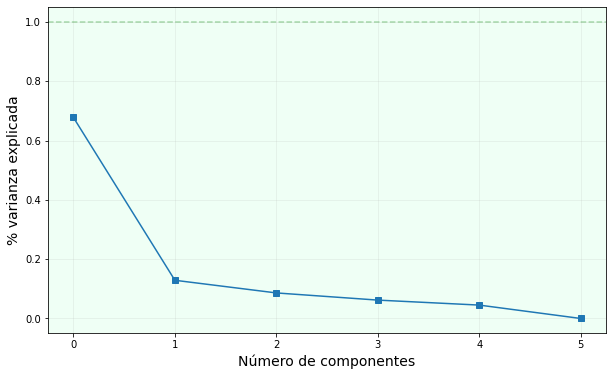

In [163]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('#EFFFF5')
plt.plot(np.arange(6), pca3.explained_variance_ratio_, marker='s', label='varianza_explicada')
plt.axhline(1, ls='--', color='g', alpha=0.3)
plt.xlabel('Número de componentes', size=14)
plt.ylabel('% varianza explicada', size=14)
plt.grid(alpha=0.2, axis='both')
plt.show()

Se puede ver que hay un cambio abrupto y notorio en el numero de componentes 1, es decir que para un futuro proceso de aprendizaje supervisado puede ser importante este dato; y con este ya disminuimos la 